### Multi-comopnent precipitation using Reaktoro on produced water for MgCO3 and CaCO3 recovery

### Diagram of the 3-step precipitation
<p align=center>
  <img src="Multi_component_precipitation.png" width="80%">
</p>

### Import packages

In [ ]:
# Import general packages
from reaktoro import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Reaktoro modules for each step
from ZLD_profile_permian import (
    molar_mass,
    permian_feed,
    NaOH,
    permian_brine,
    permian_step_1,
    plot_step_1_permian,
    permian_step_2_alt,
    plot_step_2_alt,
    permian_step_3_alt,
    plot_step_3_alt,
) 

### Step 0: Derive the solution composition of the produced water brine given a certain recovery rate

In [9]:
# Get the properties and chemical compsition of 1 L produced water brine (50% recovery rate)
permian_brine_output, permian_brine_state, permian_brine_system, permian_brine_props = permian_brine(RR=0.5)

print(permian_brine_state)

+---------------------------+------------+------+
| Property                  |      Value | Unit |
+---------------------------+------------+------+
| Temperature               |   298.1500 |    K |
| Pressure                  |     1.0132 |  bar |
| Charge:                   | 4.6520e-17 |  mol |
| Element Amount:           |            |      |
| :: H                      | 1.1068e+02 |  mol |
| :: C                      | 1.2000e-15 |  mol |
| :: O                      | 5.5383e+01 |  mol |
| :: Na                     | 3.5578e+00 |  mol |
| :: Mg                     | 6.1307e-02 |  mol |
| :: Si                     | 4.0000e-16 |  mol |
| :: S                      | 1.0332e-02 |  mol |
| :: Cl                     | 4.0412e+00 |  mol |
| :: K                      | 2.0000e-16 |  mol |
| :: Ca                     | 1.9068e-01 |  mol |
| Species Amount:           |            |      |
| :: CO2(g)                 | 1.0000e-16 |  mol |
| :: H+                     | 1.1785e-07 |  mol |


### Step 1: Add NaOH to separate Mg as brucite (Mg(OH)2)

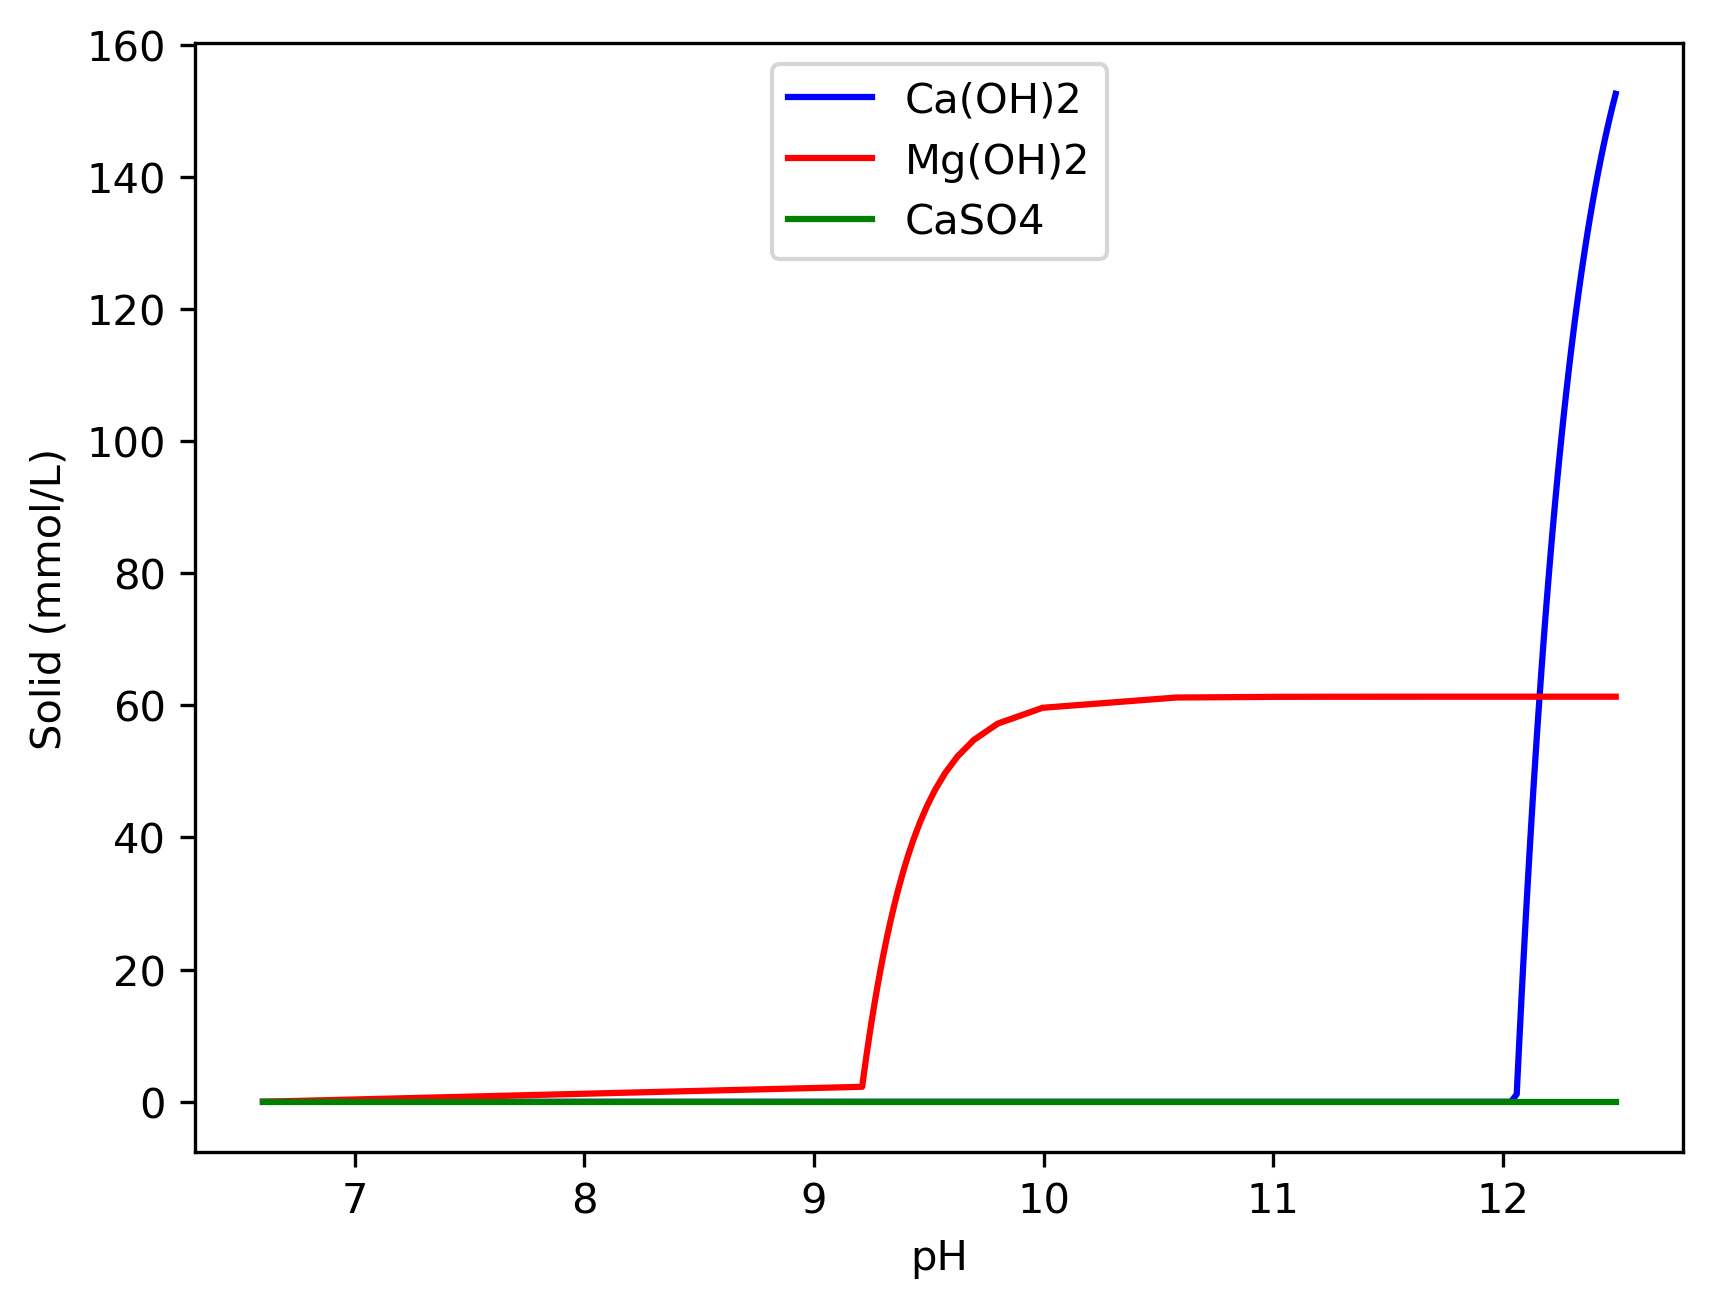

Max vol:  0.1 Conc:  5


In [3]:
# Maximum volume of added NaOH solution
maxNaOH_vol = 0.1 # L
# Concentration of NaOH solution
NaOH_conc = 5 # mol/L

RR = 0.5
Brucites, Portlandites, Mg_rr, pHs, vols, NaOHs = plot_step_1_permian(
                                                    maxNaOH_vol=maxNaOH_vol,
                                                    NaOH_conc = NaOH_conc,
                                                    RR = RR,
                                                    runs = 100,
                                                    )

### Operational point of Step 1: Add 0.025 L NaOH solution till pH=10.5

In [10]:

output_1_PB, props_1_PB, outflow_mass_1_PB, out_brucite_1_PB, state_1_PB, system_1_PB = permian_step_1(state = permian_brine_state,
                                                                                     system=permian_brine_system,
                                                                                     add_NaOH_conc=5,
                                                                                     add_NaOH_vol=0.025,
                                                                             )
print('Step 1 simulation results:')
print('pH=', output_1_PB['pH'])
print('Mg in MgOH2 (mg)', (float(props_1_PB.speciesAmount('Brucite')))* molar_mass['Mg+2'] * 1000 )
print('Mg+2 (mg)', (float(props_1_PB.speciesAmount('Mg+2')))* molar_mass['Mg+2'] * 1000 )

Step 1 simulation results:
pH= 10.577371059775484
Mg in MgOH2 (mg) 1487.0034319079423
Mg+2 (mg) 2.6778931030206397


### Step 2: Add CO2 and NaOH to carbonize Ca as CaCO3

In [8]:
CO2s, NaOHs, pHs, Ca_rr, Magnesites, Brucites, Calcites, Portlandites, Ca_Purity, Vols = plot_step_2_alt(      
                                        maxNaOH_vol = 0.1, # L
                                        NaOH_conc = 5, # mol/L
                                        max_CO2 =  15000, # mg 
                                        runs_NaOH = 20,
                                        runs_CO2 = 20
                                        )

#### Plot the recovery rate of Ca

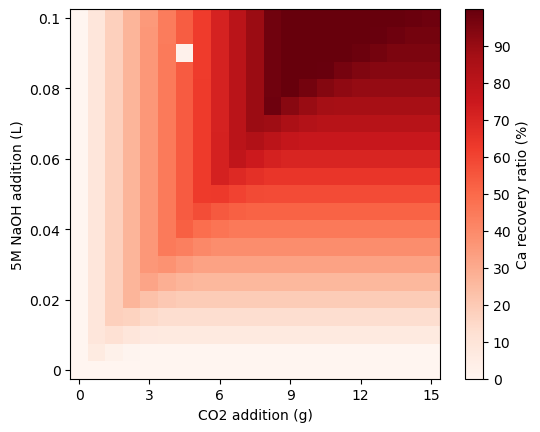

In [18]:
CO2s = [ i * 15 / 20 for i in range(0,20+1,1)]

# Plot Ca_rr
fig,  axes= plt.subplots(1,1)
ax1 = axes

im1 = ax1.imshow([Ca_rr[i-1] for i in range(len(pHs),0,-1)], cmap=plt.cm.Reds, interpolation='none')
# ax1.set_aspect(1)
ax1.set(xticks=np.arange(0, len(CO2s)+1, 4), xticklabels=np.arange(0, int(np.max(CO2s))+1, int(np.max(CO2s)/5)))
ax1.set(yticks=np.arange(0, len(NaOHs)+1, 4), yticklabels=[0.1, 0.08, 0.06, 0.04, 0.02, 0])
ax1.set_xlabel('CO2 addition (g)')
ax1.set_ylabel('5M NaOH addition (L)')
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im1,  ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.set_label('Ca recovery ratio (%)')
plt.show()

### Plot the recovery rate of pH

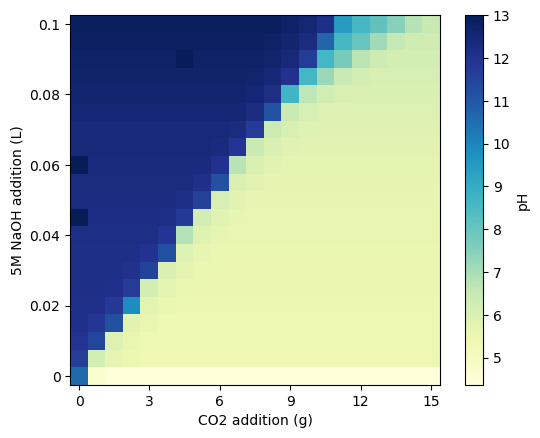

In [19]:
fig,  axes= plt.subplots(1,1)
ax1 = axes


im1 = ax1.imshow([pHs[i-1] for i in range(len(pHs),0,-1)], cmap='YlGnBu', interpolation='none', vmax =13)
# ax1.set_aspect(1)
ax1.set(xticks=np.arange(0, len(CO2s)+1, 4), xticklabels=np.arange(0, int(np.max(CO2s))+1, int(np.max(CO2s)/5)))
ax1.set(yticks=np.arange(0, len(NaOHs)+1, 4), yticklabels=[0.1, 0.08, 0.06, 0.04, 0.02, 0])

ax1.set_xlabel('CO2 addition (g)')
ax1.set_ylabel('5M NaOH addition (L)')
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im1,  ticks = [4,5,6,7,8,9,10,11,12,13])
cbar.set_label('pH')
plt.show()

### Identify from the plot that the operational point is adding 9g CO2 and 0.08L 5M NaOH solution

In [20]:
output_2_PB, props_2_PB, state_2_PB, system_2_PB = permian_step_2_alt(
                                                                    state= state_1_PB,
                                                                    system=system_1_PB,
                                                                    add_NaOH_conc=5,
                                                                    add_NaOH_vol=0.08,
                                                                    add_CO2 = 9000, # mg
                                                                    )
print('Step 2 simulation')
print('pH=', output_2_PB['pH'])
print('Ca precipitated (g)', float(props_2_PB.speciesAmount('Calcite')) * molar_mass['Ca+2'])
print('Mg precipitated (g)', (float(props_2_PB.speciesAmount('Magnesite')) + float(props_2_PB.speciesAmount('Brucite')))* molar_mass['Mg+2'])
print('Ca rec rate', float(props_2_PB.speciesAmount('Calcite')) / float(props_2_PB.elementAmount('Ca')))
total_solid = (float(props_2_PB.speciesAmount("Calcite"))*molar_mass["Calcite"]
                + float(props_2_PB.speciesAmount("Brucite"))*molar_mass["Brucite"]
                + float(props_2_PB.speciesAmount("Magnesite"))* molar_mass["Magnesite"]
)
print("Ca purity (%)", float(props_2_PB.speciesAmount("Calcite"))*molar_mass["Calcite"]/total_solid*100)

Step 2 simulation
pH= 8.712375815834674
Ca precipitated (g) 7.633134415914374
Mg precipitated (g) 4.861e-15
Ca rec rate 0.9988125430751896
Ca purity (%) 99.99999999999993


### Step 3: Add CO2 and brucite to the filtrate for Mg carbonization as MgCO3

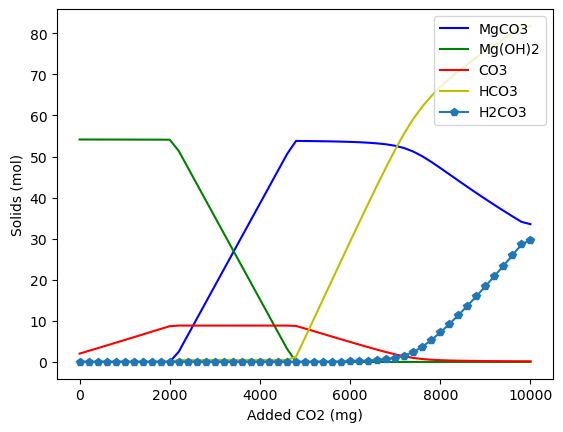

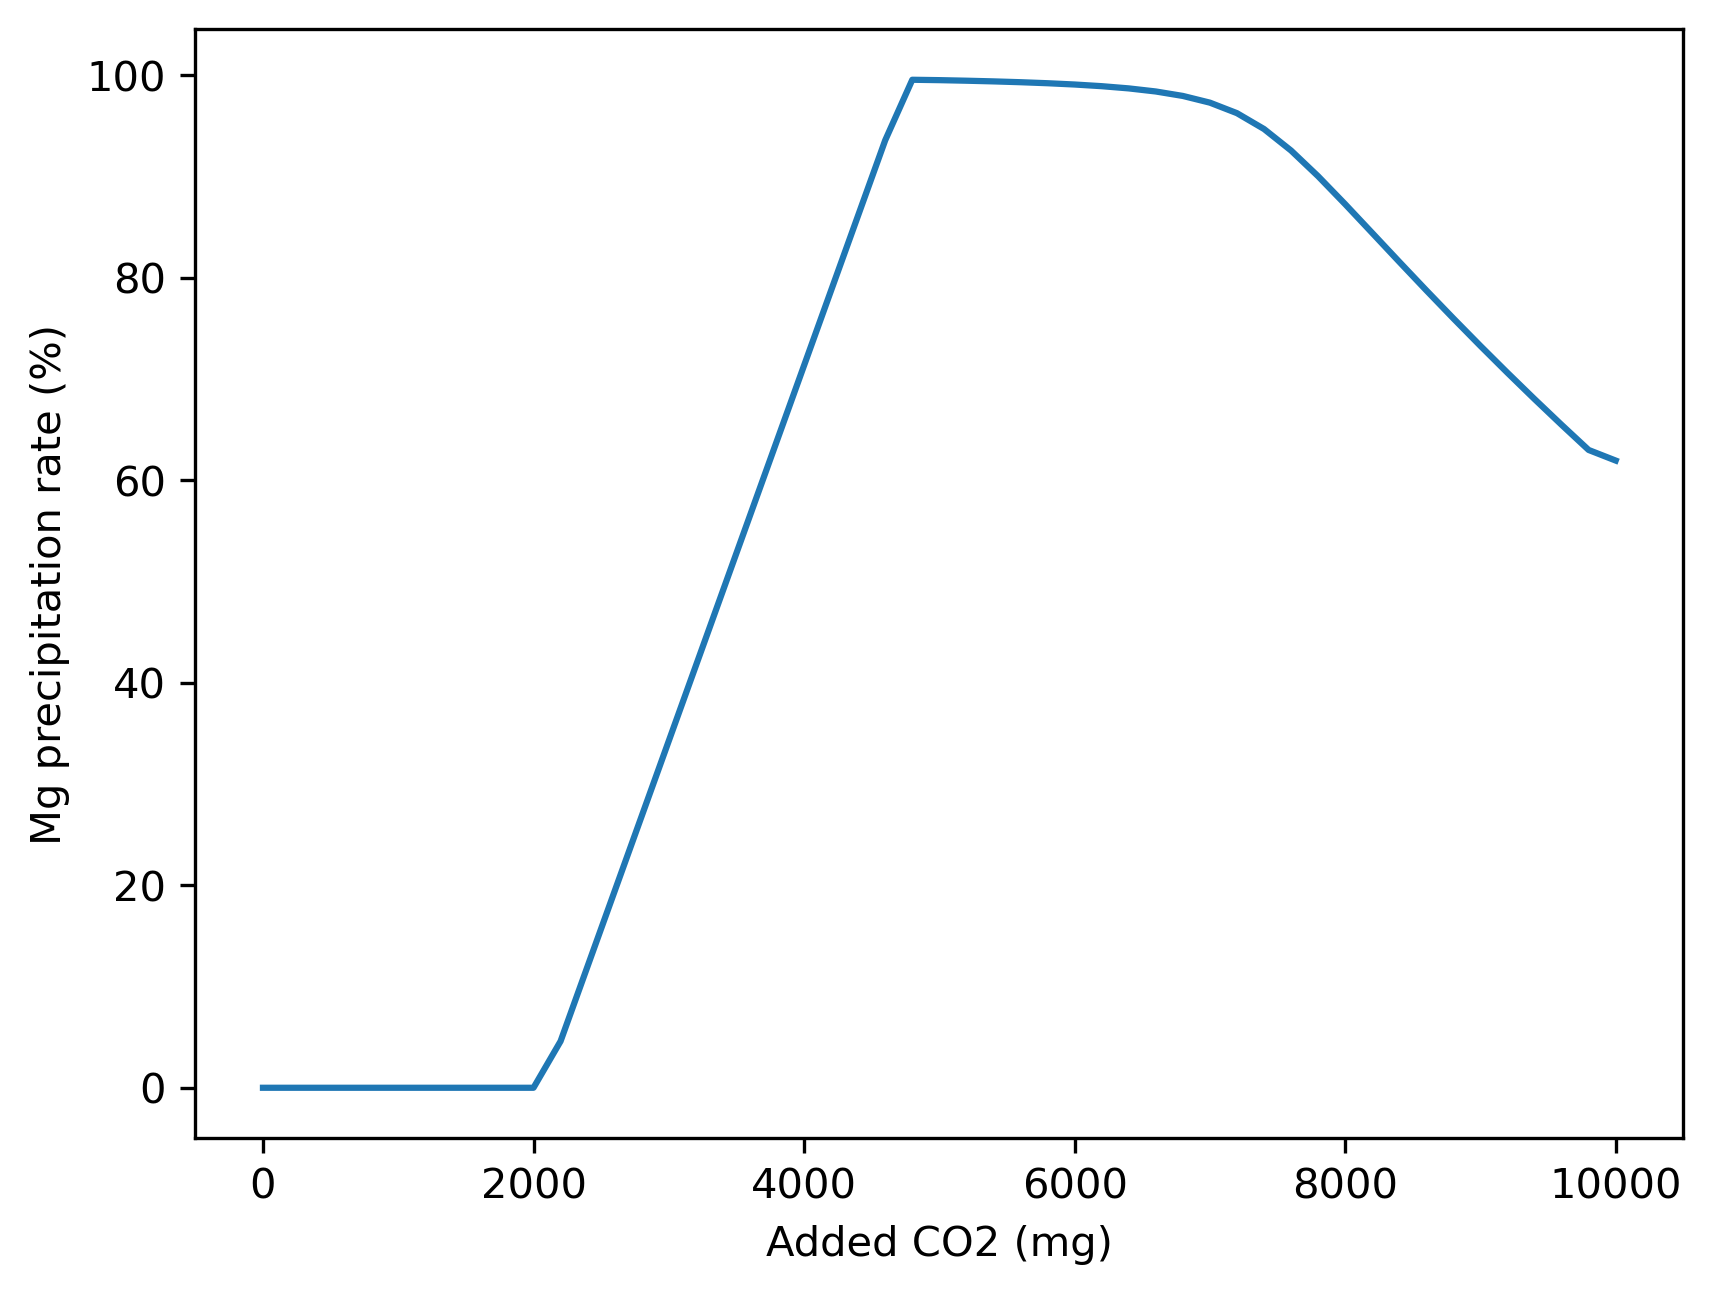

In [21]:
NaOH_vol = 0.02
max_CO2 = 10000
runs_CO2 = 50
CO2s = [ i * max_CO2 / runs_CO2 for i in range(0,runs_CO2+1,1)]

Mgs_3, Magnesites_3, Brucites_3, Calcites_3, Mg_rr_3, pHs_3, vols_3,CO3s_3, HCO3s_3, H2CO3s_3 = plot_step_3_alt(
                                                                max_CO2=max_CO2,
                                                                runs_CO2=runs_CO2,
                                                                NaOH_vol = NaOH_vol,
                                                                )

#### Identify the operational point for step 3 is to add 2.6 gram CO2

In [22]:

output_3_PB, props_3_PB, outflow_mass_3, state_3_PB, system_3_PB = permian_step_3_alt(
                                                                             state= state_2_PB,
                                                                             system=system_2_PB,
                                                                             add_CO2 = 2600,
                                                                             add_NaOH_conc=5,
                                                                             add_NaOH_vol=0,
                                                                             add_brucite=out_brucite_1_PB,
                                                                             )
print('Step 3 simulation')
print('pH: ', output_3_PB['pH'])
print('Mg in MgCO3:', float(props_3_PB.speciesAmount("Magnesite")) * molar_mass["Mg+2"])
print('Mg in MgOH2:', float(props_3_PB.speciesAmount("Brucite")) * molar_mass["Mg+2"])

Step 3 simulation
pH:  9.31803602186023
Mg in MgCO3: 1.4581186016468375
Mg in MgOH2: 2.4305e-15
